In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json 
import pandas as pd

In [2]:
with open("./0508/fitted_params.json", 'r') as file:
    params_v1 = json.load(file)
    df1 = pd.DataFrame(params_v1)

with open("./0521/fitted_params.json", 'r') as file:
    params_v2 = json.load(file)
    df2 = pd.DataFrame(params_v2)

In [3]:
df = pd.concat([df1, df2], axis=0)
df.head()

,AA,SN,alpha,r_sphere,r_cap_cyl_length,r_cap_cyl_radius,r_cap_cyl_cap_radius,units
0,39.0,39.0,1.000002,1.396179,17.126038,27.018286,23.130297,nm
1,152.0,0.0,0.556317,1.540627,5.850006,12.949073,24.899991,nm
2,0.0,152.0,1.000005,1.386204,47.480136,33.211083,4.824508,nm
3,28.0,66.0,1.000002,1.439851,23.248800,25.158565,15.428635,nm
4,135.0,67.0,0.561014,1.618244,44.495510,3.990818,35.839689,nm


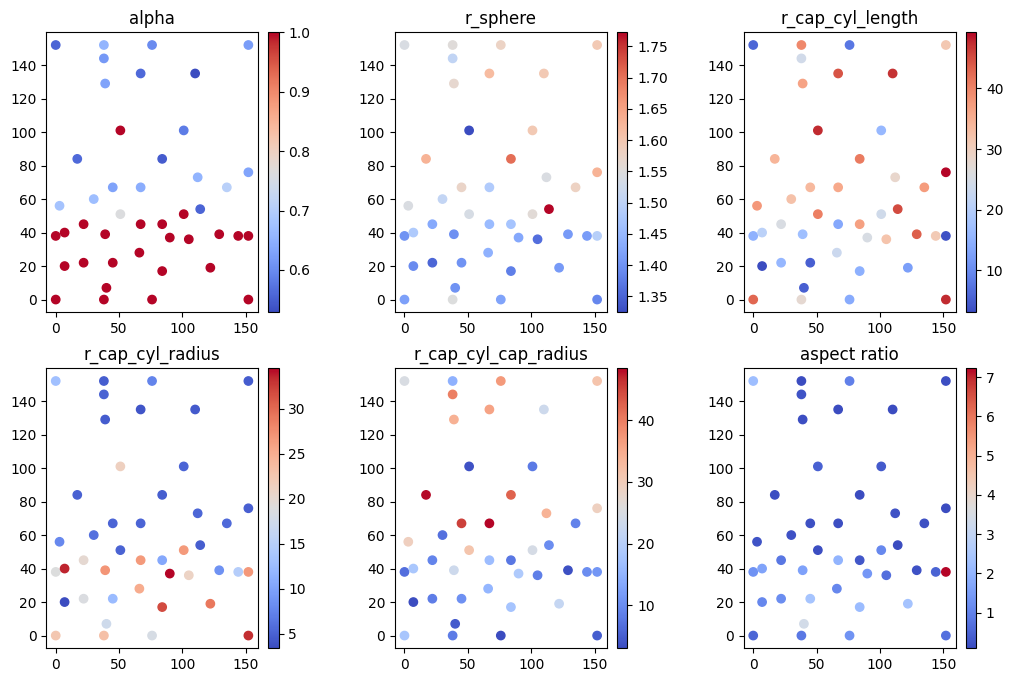

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(2,3, figsize=(4*3, 4*2))
fig.subplots_adjust(wspace=0.5, hspace=0.2)
for i, ax in enumerate(axs.flatten()):
    if i==5:
        color = df["r_cap_cyl_radius"]/df["r_cap_cyl_length"]
        name = "aspect ratio"
    else:
        color = df.iloc[:,i+2]
        name = df.columns[i+2]
    im = ax.scatter(df["SN"], df["AA"], 
                    c= color,
                    cmap="coolwarm"
                )
    ax.set_title(name)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()